# USDA Foods 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import json

In [4]:
data = json.load(open('./USDA_FOOD/database.json'))

In [14]:
pd.DataFrame(data[:10])

,id,description,tags,manufacturer,group,portions,nutrients
0,1008,"Cheese, caraway",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 4.22, 'units': 'g', 'description': ..."
3,1019,"Cheese, feta",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, crumbled', 'grams...","[{'value': 5.2, 'units': 'g', 'description': '..."
4,1028,"Cheese, mozzarella, part skim milk",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 3.27, 'units': 'g', 'description': ..."
5,1029,"Cheese, mozzarella, part skim milk, low moisture",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 3.72, 'units': 'g', 'description': ..."
6,1038,"Cheese, romano",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 31.8, 'units': 'g', 'description': ..."
7,1039,"Cheese, roquefort",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 21.54, 'units': 'g', 'description':..."
8,1048,"Cheese spread, pasteurized process, american, ...",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 16.41, 'units': 'g', 'description':..."
9,1049,"Cream, fluid, half and half",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup', 'grams': 242.0},...","[{'value': 2.96, 'units': 'g', 'description': ..."


Now the Portions and Nutreintes columns are the tables themselves. So I think we need to convert them into the df.

In [19]:
food_list = pd.DataFrame(data, columns= ['id', 'description', 'group', 'manufacturer'])
food_list

,id,description,group,manufacturer
0,1008,"Cheese, caraway",Dairy and Egg Products,
1,1009,"Cheese, cheddar",Dairy and Egg Products,
2,1018,"Cheese, edam",Dairy and Egg Products,
3,1019,"Cheese, feta",Dairy and Egg Products,
4,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,
...,...,...,...,...
6631,42161,"Bologna, beef, low fat",Sausages and Luncheon Meats,
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,
6633,43408,"Babyfood, juice, pear",Baby Foods,None
6634,43539,"Babyfood, dessert, banana yogurt, strained",Baby Foods,None


In [20]:
food_list.group.value_counts()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

Now, making a nutreints table.

In [34]:
nutreints = []
for food in data:
    nut_list = food.get('nutrients', None)
    if nut_list:
        for nut in nut_list:
            nut['id'] = food['id']
        nutreints.extend(nut_list)

In [40]:
nutreints = pd.DataFrame(nutreints)
nutreints

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [41]:
nutreints.duplicated().sum()

14179

In [42]:
nutreints.drop_duplicates(inplace= True)

In [46]:
food_list.rename({'description': 'food',
                  'group': 'food_group'}, axis= 1, inplace= True)

In [50]:
nutreints.rename({'description': 'nutrient',
                  'group': 'nut_group'}, axis=1, inplace= True)

In [52]:
food_list.head()

,id,food,food_group,manufacturer
0,1008,"Cheese, caraway",Dairy and Egg Products,
1,1009,"Cheese, cheddar",Dairy and Egg Products,
2,1018,"Cheese, edam",Dairy and Egg Products,
3,1019,"Cheese, feta",Dairy and Egg Products,
4,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,


In [51]:
nutreints.head()

,value,units,nutrient,nut_group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


# 

Merging

In [55]:
new_data = pd.merge(food_list, nutreints, on= 'id', how= 'outer')
new_data

,id,food,food_group,manufacturer,value,units,nutrient,nut_group
0,1008,"Cheese, caraway",Dairy and Egg Products,,25.180,g,Protein,Composition
1,1008,"Cheese, caraway",Dairy and Egg Products,,29.200,g,Total lipid (fat),Composition
2,1008,"Cheese, caraway",Dairy and Egg Products,,3.060,g,"Carbohydrate, by difference",Composition
3,1008,"Cheese, caraway",Dairy and Egg Products,,3.280,g,Ash,Other
4,1008,"Cheese, caraway",Dairy and Egg Products,,376.000,kcal,Energy,Energy
...,...,...,...,...,...,...,...,...
375171,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None,0.000,mcg,"Vitamin B-12, added",Vitamins
375172,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None,0.000,mg,Cholesterol,Other
375173,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None,0.072,g,"Fatty acids, total saturated",Other
375174,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None,0.028,g,"Fatty acids, total monounsaturated",Other


In [56]:
new_data.iloc[30000]

id                                                6158
food            Soup, tomato bisque, canned, condensed
food_group                  Soups, Sauces, and Gravies
manufacturer                                          
value                                             0.04
units                                                g
nutrient                                       Glycine
nut_group                                  Amino Acids
Name: 30000, dtype: object

## Now finding the meadian of nutrition value per food group


In [71]:
result = new_data.groupby(['food_group', 'nutrient'])['value'].quantile(.5)
result

food_group                         nutrient                    
Baby Foods                         Alanine                          0.085
                                   Alcohol, ethyl                   0.000
                                   Arginine                         0.104
                                   Ash                              0.620
                                   Aspartic acid                    0.220
                                                                    ...  
Vegetables and Vegetable Products  Vitamin E (alpha-tocopherol)     0.290
                                   Vitamin E, added                 0.000
                                   Vitamin K (phylloquinone)        9.000
                                   Water                           89.195
                                   Zinc, Zn                         0.330
Name: value, Length: 2246, dtype: float64

In [72]:
result = result.unstack()

<AxesSubplot:ylabel='food_group'>

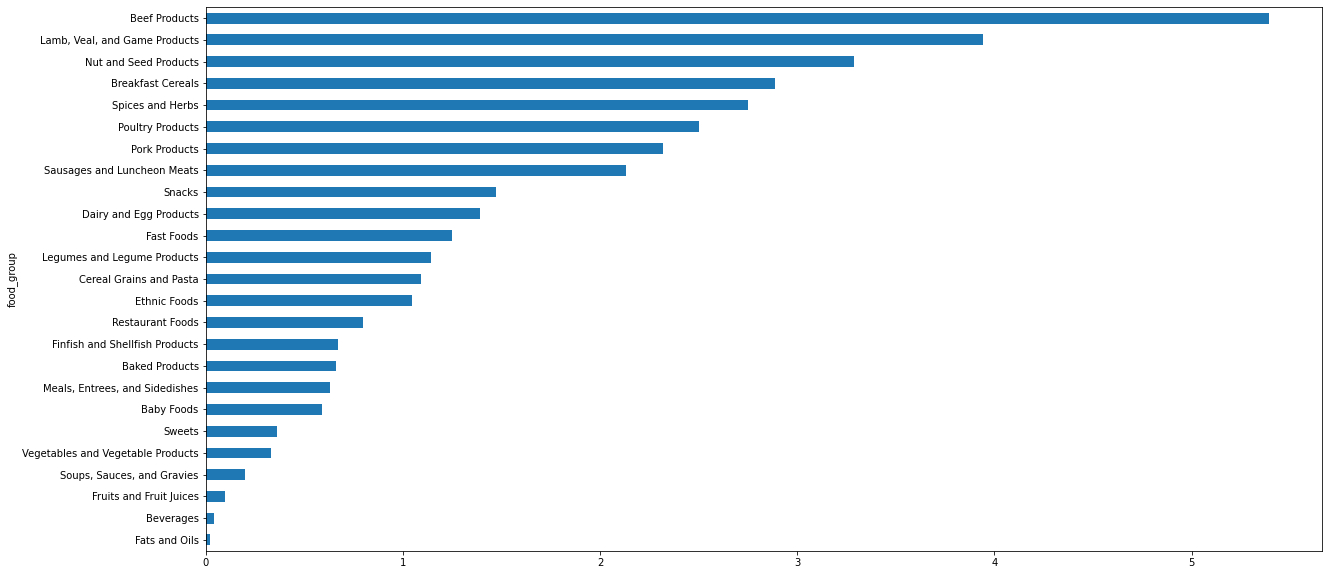

In [73]:
result['Zinc, Zn'].sort_values().plot(kind= 'barh', figsize= (20, 10))

## Which food is most dense in each nutrient 

In [75]:
new_data[1:2]

,id,food,food_group,manufacturer,value,units,nutrient,nut_group
1,1008,"Cheese, caraway",Dairy and Egg Products,,29.2,g,Total lipid (fat),Composition


In [77]:
dense = new_data.groupby(['nut_group','nutrient'])

In [82]:
dense.apply(lambda group: group.loc[group.value.idxmax()])[['value', 'food']]

value  \
nut_group   nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                       food  
nut_group   nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

# 

# That's it!
I know, this is not so much exploration in this dataset, but still there was plenty of things to learn. The main part of learning from this dataset was **How to wrangle the data so that it can fit in a single DF** 

I like how to make the data exploration possible when the given data is INCEPTION kind of. (Table inside a Table)